In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df_bids = pd.read_csv('/Users/hazemeseifan/Library/Mobile Documents/com~apple~CloudDocs/Work/facebook-recruiting-iv-human-or-bot/bids.csv')
train_df = pd.read_csv('/Users/hazemeseifan/Library/Mobile Documents/com~apple~CloudDocs/Work/facebook-recruiting-iv-human-or-bot/train.csv')

In [255]:
df_bids.head ()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [119]:
for col in df_bids.columns:
    print(col)

bid_id
bidder_id
auction
merchandise
device
time
country
ip
url


## Question 1:
### For each auction, the number of unique ip addresses

In [239]:
unique_ips= df_bids.groupby ('auction') ['ip'].nunique()
new_column_names = [ 'No. unique IPs']
unique_ips.to_csv ('uniqueIps.csv',  header=new_column_names)

# 

***

## Question 2:

### For each merchandise type, the country which sent the maximum number of bids (in the csv, include also the number of bids sent by that country)

In [303]:
merch = df_bids.groupby(['merchandise', 'country'], as_index= False).agg ({'bid_id': 'count'})

merch

,merchandise,country,bid_id
0,auto parts,ae,1
1,auto parts,au,1
2,auto parts,bd,503
3,auto parts,bn,21
4,auto parts,ca,89
...,...,...,...
1519,sporting goods,ye,82
1520,sporting goods,za,118915
1521,sporting goods,zm,12943
1522,sporting goods,zw,12654


In [304]:
merch=merch.loc[merch.reset_index().groupby(['merchandise'])['bid_id'].idxmax()]

merch

,merchandise,country,bid_id
14,auto parts,in,2243
101,books and music,in,11820
230,clothing,in,7619
411,computers,th,16731
495,furniture,in,47031
675,home goods,in,169649
861,jewelry,in,560773
1050,mobile,in,578076
1225,office equipment,in,56140
1411,sporting goods,in,346852


In [249]:
new_column_names = [ 'Merch type', 'Country with max bids', 'no. of bids']
merch.to_csv ('bids_per_merch_type.csv',  header=new_column_names, index = False)

# 

***

## Question 3:

### The data contains three separate time periods.  Calculate average number of unique bidders per auction in each of the three separate time periods

To visualise the time periods, we'll draw some scatter plots.

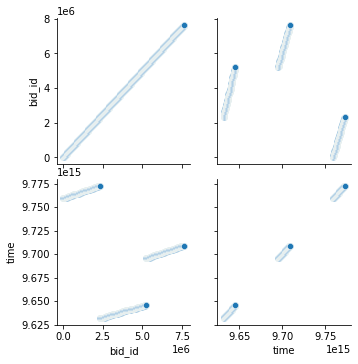

In [253]:
g = sns.PairGrid(df_bids)
g.map(sns.scatterplot)

<AxesSubplot:xlabel='time', ylabel='time'>

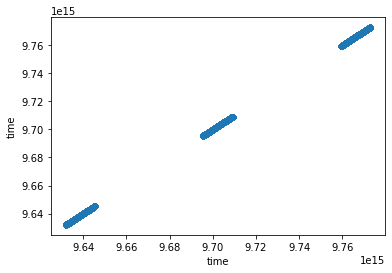

In [254]:
df_bids.plot (kind = 'scatter', x = 'time', y = 'time')

We can clarly see the three periods here.  I’ll group them under:
1. "period_1" from 0 to 9680000000000000
2. "period_2" from 9680000000000000 to 9740000000000000
3. "period_3 above 9740000000000000

I’ll then add these time perids as a column the DF ang group by it.


In [259]:
def time_period (row):
    if 0< row['time']< 9680000000000000 :
      return 'period_1'
    if 9680000000000000< row['time']<  9740000000000000:
      return 'period_2'
    if 9740000000000000< row['time'] :
     return 'period_3'
    return 

In [263]:
df_bids ['time_period'] = df_bids.apply (lambda row: time_period (row), axis=1)


In [300]:

periods= df_bids.groupby (['time_period', 'auction'], as_index= False).agg ({'bidder_id':'nunique'}) 
periods

,time_period,auction,bidder_id
0,period_1,00hm5,6
1,period_1,00sj9,2
2,period_1,010lx,51
3,period_1,0143v,10
4,period_1,01dgm,9
...,...,...,...
19006,period_3,zzal8,12
19007,period_3,zzbm9,1
19008,period_3,zznnc,1
19009,period_3,zztha,2


In [301]:
periods= periods.groupby (('time_period'), as_index= False).agg ({'bidder_id':'mean'}) 

periods

,time_period,bidder_id
0,period_1,23.316925
1,period_2,22.509774
2,period_3,21.280234


In [302]:
new_column_names = [ 'Period', 'average unique bidders per bid']
periods.to_csv ('periods.csv',  header=new_column_names, index = False)

# 

***

# Question 4:
### For each country, the fraction of times a bid from that country was identified as coming from a robot

Note: it is not exactly clear to me what you mean by "the fraction of times".  Do you mean the fraction of bids that came from robots?  Or the duration during which bids came from robots? Or the time difference between bids from robots?  I took the first hypothesis, it seemed the most likley to me. 

In [399]:
df_bids = pd.read_csv('/Users/hazemeseifan/Library/Mobile Documents/com~apple~CloudDocs/Work/facebook-recruiting-iv-human-or-bot/bids.csv')
df_train = pd.read_csv('/Users/hazemeseifan/Library/Mobile Documents/com~apple~CloudDocs/Work/facebook-recruiting-iv-human-or-bot/train.csv')

In [444]:
df_bids.head ()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [445]:
df_train.head ()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [396]:
# We have 6,614 unique bidders
len(df_bids ['bidder_id'].unique().tolist())



6614

In [380]:
#Check to see if all bidder_ids in df_train are unique: they are.
# This means no bidder was identified sometimes as robot, sometimes as human.
len(df_train ['bidder_id'].unique().tolist())


2013

Next I’ll join the bidder outcomes (robot or human to the main bidder data frame).
df_train is a subset of the total (it is a training set), so I’ll do an inner join,
This will truncate df_bidder by removing unclassified bidders (bidders that are not in df_train), but it is ok, since we are not interested in biders that have not been classified.



In [624]:

df_outcomes = pd.merge(df_bids, df_train, on='bidder_id', how='inner')

#Count all the variables, inserting 0 where the count is 0
df_outcomes = df_outcomes.groupby(['country','outcome']).count().unstack(fill_value=0).stack()
df_outcomes= df_outcomes.reset_index(level=0)
df_outcomes.drop(df_outcomes.columns.difference(['outcome','country','bid_id']), 1, inplace=True)
df_outcomes[ 'percentage'] = df_outcomes.groupby('country').apply(lambda x: x / float(x.sum()))
df_outcomes= df_outcomes.reset_index()
df_outcomes




/var/folders/r_/cj1mjlpj3hv8g4c245j9z6j80000gn/T/ipykernel_28648/883300981.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_outcomes.drop(df_outcomes.columns.difference(['outcome','country','bid_id']), 1, inplace=True)


,outcome,country,bid_id,percentage
0,0.0,ad,10,0.714286
1,1.0,ad,4,0.285714
2,0.0,ae,14330,0.914778
3,1.0,ae,1335,0.085222
4,0.0,af,1963,0.955231
...,...,...,...,...
391,1.0,zm,461,0.029700
392,0.0,zw,14688,0.984187
393,1.0,zw,236,0.015813
394,0.0,zz,3,0.750000


In [625]:
# Keep only odd-numbered rows, et voilà:
l=[]
for i in df_outcomes.index.values:
    if(i%2==1):
        l.append(i)

df_outcomes =df_outcomes.iloc [l]
df_outcomes= df_outcomes.drop (['outcome','bid_id'], axis=1)

In [626]:
df_outcomes

,country,percentage
1,ad,0.285714
3,ae,0.085222
5,af,0.044769
7,ag,0.666667
9,al,0.022230
...,...,...
387,ye,0.109170
389,za,0.086032
391,zm,0.029700
393,zw,0.015813


In [619]:
new_column_names = [ 'country', 'fraction of bids from robots']
df_outcomes.to_csv ('robot_fraction.csv',  header=new_column_names, index = False)